In [216]:
import pandas as pd
import numpy as np
import math
import re
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split

In [186]:
df = pd.read_csv('data/train_cleanV2.csv')

In [189]:
df.sample(10)

,Id,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MasVnrType_Stone,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NoBsmt,BsmtExposure_NoExposure
214,215,66.019264,10900,20,6,7,1977,1977,153.0,3,...,0,0,0,0,1,0,0,0,0,1
1334,1343,75.000000,9375,20,8,5,2002,2002,149.0,4,...,0,0,0,0,1,0,0,0,0,1
821,825,81.000000,11216,22,8,5,2006,2006,0.0,4,...,0,0,0,0,0,1,0,0,0,1
1091,1098,43.277802,3696,25,8,5,1986,1986,0.0,4,...,0,0,0,0,1,0,0,0,0,1
24,25,55.400493,8246,12,5,8,1968,2001,0.0,3,...,0,0,0,0,1,0,0,1,0,0
636,639,67.000000,8777,6,5,7,1910,1950,0.0,3,...,0,0,0,0,1,0,0,0,0,1
365,367,75.647886,9500,10,6,5,1963,1963,247.0,3,...,0,0,0,0,1,0,0,0,0,1
576,579,34.000000,3604,22,7,5,2007,2007,0.0,4,...,0,0,0,0,0,0,0,0,0,1
428,430,130.000000,11457,21,6,5,1988,1988,0.0,3,...,0,0,0,0,1,0,0,1,0,0
401,403,60.000000,10200,12,5,8,1940,1997,0.0,3,...,0,0,0,0,1,0,0,0,0,1


In [190]:
list(df.columns)

['Id',
 'LotFrontage',
 'LotArea',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'TotalBsmtSF',
 'HeatingQC',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Gar2',
 'Shed',
 'TenC',
 'TotalBath',
 'Bedroom/Bathroom',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Exterior1st_MetalSd',
 'Exterior1st_Other',
 'Exterior1st_Plywood',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_VinylSd',
 'Exteri

In [191]:
df[df.isna().any(axis=1)]

,Id,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MasVnrType_Stone,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NoBsmt,BsmtExposure_NoExposure


In [192]:
from sklearn import ensemble

In [193]:
randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(random_state=42, n_estimators=50, max_features=4)
df_X = df.loc[:,(df.columns != 'Id') & (df.columns != 'SalePrice')]
randomForest.fit(np.array(df_X), np.array(df['SalePrice']))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [194]:
feature_importance = sorted(list(zip(list(df_X.columns), list(randomForest.feature_importances_))), key=lambda tup: tup[1], reverse=True)

In [195]:
top_features = list(filter(lambda tup: tup[1] > 0.01, feature_importance))
top_features

[('GrLivArea', 0.08766640552552343),
 ('KitchenQual', 0.06022168395692503),
 ('OverallQual', 0.05676703259923115),
 ('TotalBsmtSF', 0.05523778606509845),
 ('BsmtQual', 0.05322223460501342),
 ('YearBuilt', 0.05211839397622077),
 ('GarageArea', 0.04729969578375304),
 ('GarageYrBlt', 0.04326342775452955),
 ('Neighborhood', 0.04179979168615906),
 ('LotArea', 0.03375791435523899),
 ('TotalBath', 0.03263742357732375),
 ('GarageCars', 0.03236590449312141),
 ('YearRemodAdd', 0.03191857977923782),
 ('ExterQual', 0.029965752146518355),
 ('TotRmsAbvGrd', 0.029158476471342645),
 ('LotFrontage', 0.025969209318625595),
 ('FireplaceQu', 0.025537898836762482),
 ('Fireplaces', 0.023338136123020343),
 ('MasVnrArea', 0.022667275073025406),
 ('GarageFinish', 0.020331124621180793),
 ('OpenPorchSF', 0.018159613336623866),
 ('Bedroom/Bathroom', 0.014277648245383046),
 ('HeatingQC', 0.013170917857274297),
 ('WoodDeckSF', 0.012075955983003768),
 ('Foundation_PConc', 0.010675446926609345)]

In [196]:
len(top_features)

25

In [197]:
randomForest.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [198]:
randomForest.score(np.array(df_X), np.array(df['SalePrice']))

0.9775430519105217

In [199]:
import sklearn.model_selection as ms

cv_k5 = ms.KFold(n_splits=5)
randomForest_cv = ensemble.RandomForestRegressor()
randomForest_cv.set_params(random_state=42, n_estimators=50, max_features=4)
cv_scores = ms.cross_val_score(randomForest_cv, np.array(df_X), np.array(df['SalePrice']),cv=5)
cv_scores

array([0.88043773, 0.82804883, 0.8428225 , 0.8674888 , 0.79522355])

In [200]:
top25_features = list(map(lambda x: x[0], top_features))
top25_features

['GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'BsmtQual',
 'YearBuilt',
 'GarageArea',
 'GarageYrBlt',
 'Neighborhood',
 'LotArea',
 'TotalBath',
 'GarageCars',
 'YearRemodAdd',
 'ExterQual',
 'TotRmsAbvGrd',
 'LotFrontage',
 'FireplaceQu',
 'Fireplaces',
 'MasVnrArea',
 'GarageFinish',
 'OpenPorchSF',
 'Bedroom/Bathroom',
 'HeatingQC',
 'WoodDeckSF',
 'Foundation_PConc']

In [201]:
df.loc[:, df.columns.isin(top30_features)]

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtFinType1,TotalBsmtSF,...,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,TotalBath,Bedroom/Bathroom,Foundation_CBlock
0,65.0,8450,7,2003,2003,196.0,4,4,6,856,...,0,2003.0,2,2,548,0,61,4,0.75,0
1,80.0,9600,6,1976,1976,0.0,3,4,5,1262,...,3,1976.0,2,2,460,298,0,3,1.00,1
2,68.0,11250,7,2001,2002,162.0,4,4,6,920,...,3,2001.0,2,2,608,0,42,4,0.75,0
3,60.0,9550,7,1915,1970,0.0,3,3,5,756,...,4,1998.0,1,3,642,0,35,2,1.50,0
4,84.0,14260,8,2000,2000,350.0,4,4,6,1145,...,3,2000.0,2,3,836,192,84,4,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,62.0,7917,6,1999,2000,0.0,3,4,1,953,...,3,1999.0,2,2,460,0,40,3,1.00,0
1448,85.0,13175,6,1978,1988,119.0,3,4,5,1542,...,3,1978.0,1,2,500,349,0,3,1.00,1
1449,66.0,9042,7,1941,2006,0.0,5,3,6,1152,...,4,1941.0,2,1,252,0,60,2,2.00,0
1450,68.0,9717,5,1950,1996,0.0,3,3,6,1078,...,0,1950.0,1,1,240,366,0,2,1.00,1


In [202]:
reduced_forest = ensemble.RandomForestRegressor()
reduced_forest.set_params(random_state=42, n_estimators=50, max_features=4)
reduced_forest.fit(np.array(df.loc[:, df.columns.isin(top30_features)]), np.array(df['SalePrice']))
reduced_forest.score(np.array(df.loc[:, df.columns.isin(top30_features)]), np.array(df['SalePrice']))

0.9779327356827335

In [203]:
reduced_forest.feature_importances_

array([0.02117153, 0.03291498, 0.18950559, 0.03421561, 0.02471048,
       0.01537431, 0.07090371, 0.05034816, 0.00665969, 0.07828152,
       0.00741787, 0.0949884 , 0.06609224, 0.02209232, 0.01919537,
       0.01369099, 0.02305002, 0.02071103, 0.06335908, 0.07578419,
       0.00994531, 0.00956568, 0.03607127, 0.0122072 , 0.00174347])

In [204]:
reduced_feature_importance = sorted(list(zip(list(df.loc[:, df.columns.isin(top30_features)].columns), 
                                             list(reduced_forest.feature_importances_))), 
                                    key=lambda tup: tup[1], reverse=True)
reduced_top_features_16 = list(filter(lambda tup: tup[1] > 0.02, reduced_feature_importance))
reduced_top_features_16

[('OverallQual', 0.18950558982215454),
 ('GrLivArea', 0.094988404961557),
 ('TotalBsmtSF', 0.0782815208788697),
 ('GarageArea', 0.07578418580988315),
 ('ExterQual', 0.07090370826673434),
 ('KitchenQual', 0.06609224219125916),
 ('GarageCars', 0.06335908413669708),
 ('BsmtQual', 0.050348155596498245),
 ('TotalBath', 0.03607127170437686),
 ('YearBuilt', 0.03421560971961088),
 ('LotArea', 0.032914976522713676),
 ('YearRemodAdd', 0.024710480807174858),
 ('GarageYrBlt', 0.02305001545047999),
 ('TotRmsAbvGrd', 0.02209232001067497),
 ('LotFrontage', 0.02117152790188805),
 ('GarageFinish', 0.020711025908568065)]

In [205]:
reduced_top_features_8 = list(filter(lambda tup: tup[1] > 0.05, reduced_feature_importance))
reduced_top_features_8

[('OverallQual', 0.18950558982215454),
 ('GrLivArea', 0.094988404961557),
 ('TotalBsmtSF', 0.0782815208788697),
 ('GarageArea', 0.07578418580988315),
 ('ExterQual', 0.07090370826673434),
 ('KitchenQual', 0.06609224219125916),
 ('GarageCars', 0.06335908413669708),
 ('BsmtQual', 0.050348155596498245)]

In [206]:
top16_features = list(map(lambda x: x[0], reduced_top_features_16))
top16_features

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageArea',
 'ExterQual',
 'KitchenQual',
 'GarageCars',
 'BsmtQual',
 'TotalBath',
 'YearBuilt',
 'LotArea',
 'YearRemodAdd',
 'GarageYrBlt',
 'TotRmsAbvGrd',
 'LotFrontage',
 'GarageFinish']

In [207]:
top8_features = list(map(lambda x: x[0], reduced_top_features_8))
top8_features

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageArea',
 'ExterQual',
 'KitchenQual',
 'GarageCars',
 'BsmtQual']

In [208]:
reduced16_forest = ensemble.RandomForestRegressor()
reduced16_forest.set_params(random_state=42, n_estimators=50, max_features=4)
reduced16_forest.fit(np.array(df.loc[:, df.columns.isin(top16_features)]), np.array(df['SalePrice']))
reduced16_forest.score(np.array(df.loc[:, df.columns.isin(top16_features)]), np.array(df['SalePrice']))

0.9780820422986479

In [209]:
reduced16_forest.feature_importances_

array([0.02160106, 0.04358842, 0.22912989, 0.05056003, 0.01979849,
       0.10041096, 0.03262423, 0.07906957, 0.14116877, 0.05429698,
       0.02402034, 0.02565614, 0.01115633, 0.08072213, 0.04457439,
       0.04162228])

In [210]:
reduced8_forest = ensemble.RandomForestRegressor()
reduced8_forest.set_params(random_state=42, n_estimators=50, max_features=4)
reduced8_forest.fit(np.array(df.loc[:, df.columns.isin(top8_features)]), np.array(df['SalePrice']))
reduced8_forest.score(np.array(df.loc[:, df.columns.isin(top8_features)]), np.array(df['SalePrice']))

0.9740138373376618

In [211]:
reduced8_forest.feature_importances_

array([0.34162391, 0.0999509 , 0.04211375, 0.10300113, 0.18919154,
       0.04439218, 0.11449503, 0.06523156])

In [176]:
from sklearn.model_selection import GridSearchCV
grid_para_forest = [{
    "max_depth": range(2,6),
    "max_features": range(2, 6),
    "n_estimators": range(50, 1050, 50)
}]

In [177]:
grid_forest_8 = GridSearchCV(reduced_forest, grid_para_forest, cv=5, scoring='r2', n_jobs=-1, return_train_score=True, verbose=1)
grid_forest_8.fit(np.array(df.loc[:, df.columns.isin(top30_features)]), np.array(df['SalePrice']))

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 211 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 461 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1261 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 10.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None, max_features=4,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_depth': range(2, 6), 'max_features': range(2, 6),
                          'n_esti

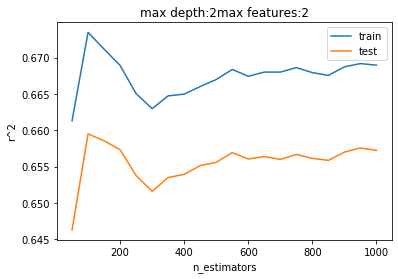

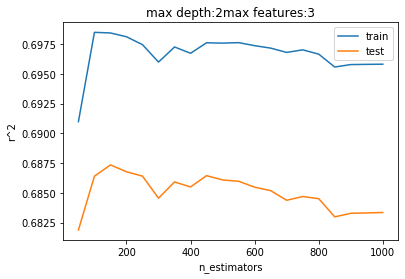

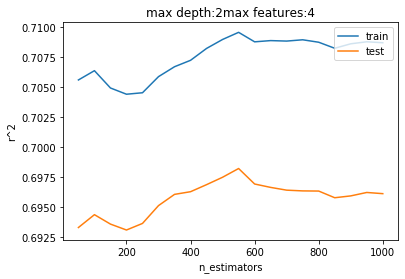

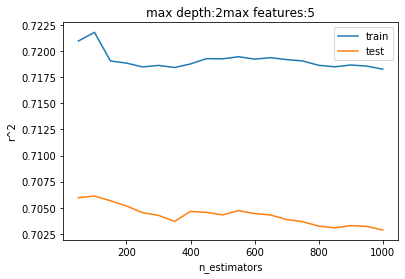

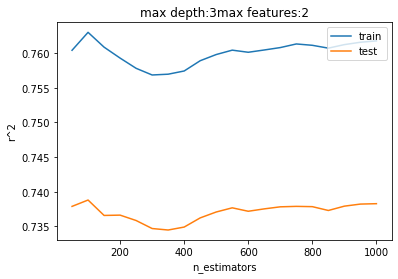

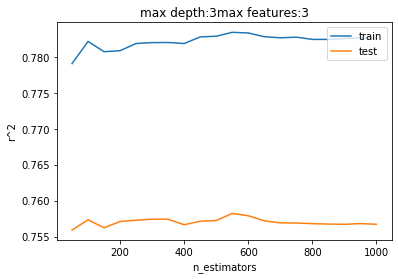

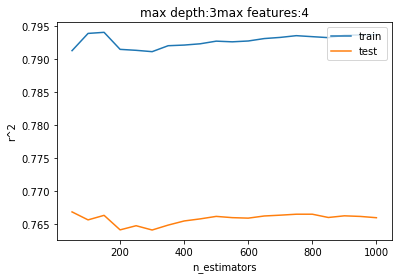

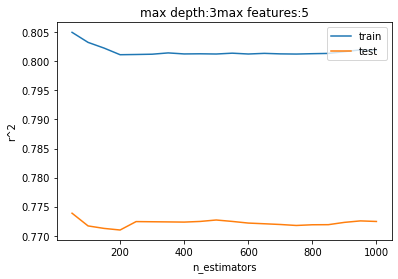

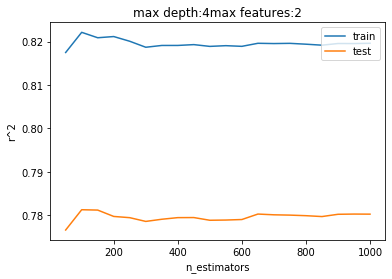

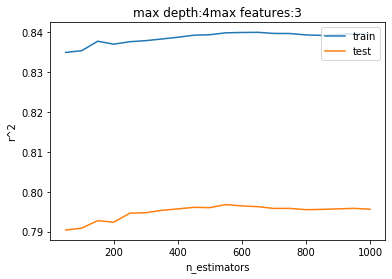

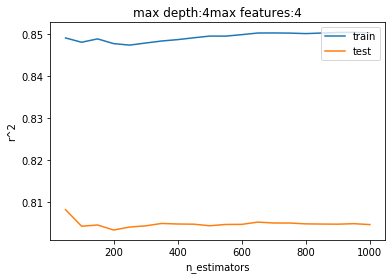

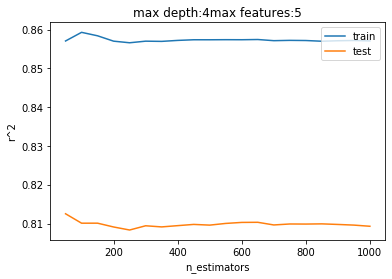

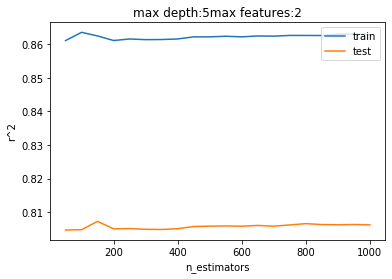

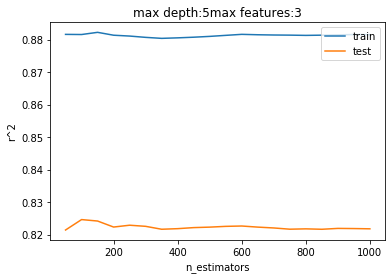

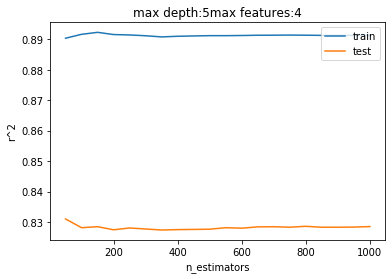

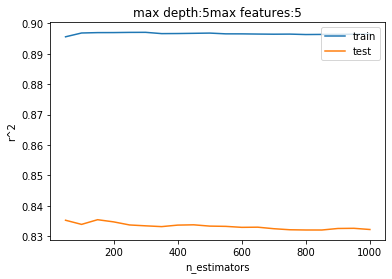

In [178]:
train_r2 = {}
test_r2 = {}
for i in range(len(grid_forest_8.cv_results_['mean_test_score'])):
    max_depth = grid_forest_8.cv_results_['params'][i]['max_depth']
    max_features = grid_forest_8.cv_results_['params'][i]['max_features']
    if (max_depth, max_features) in train_r2.keys():
        train_r2[(max_depth, max_features)].append(grid_forest_8.cv_results_['mean_train_score'][i])
        test_r2[(max_depth, max_features)].append(grid_forest_8.cv_results_['mean_test_score'][i])
    else:
        train_r2[(max_depth, max_features)] = [grid_forest_8.cv_results_['mean_train_score'][i]]
        test_r2[(max_depth, max_features)] = [grid_forest_8.cv_results_['mean_test_score'][i]]
train_r2

for (max_depth, max_features) in train_r2.keys():
    plt.plot(range(50, 1050, 50), train_r2[(max_depth, max_features)], label='train')
    plt.plot(range(50, 1050, 50), test_r2[(max_depth, max_features)], label='test')
    plt.legend(loc=1)    
    plt.xlabel('n_estimators')
    plt.ylabel('r^2')
    plt.title('max depth:' + str(max_depth) + 'max features:' + str(max_features))
    plt.show()

In [212]:
feature_selection = [1, 2, 3, 4, 5]

features = []
train_scores = []
test_scores = []

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

for k_features in feature_selection:
    forest_forward = ensemble.RandomForestRegressor()
    forest_forward.set_params(random_state=42, n_estimators=100, max_features=4)
    sfs1 = sfs(forest_forward,
               k_features=k_features,
               forward=True,
               floating=False,
               verbose=2,
               scoring='r2',
               cv=5,
               n_jobs=-1)
    sfs1 = sfs1.fit(np.array(df_X), np.array(df['SalePrice']))
    feat_cols = list(sfs1.k_feature_idx_)
    features.append(feat_cols)
    print('Features: ' + str(feat_cols))
    forest_forward.fit(df_X.iloc[:,feat_cols], df['SalePrice'])
    train_scores.append(forest_forward.score(df_X.iloc[:,feat_cols], df['SalePrice']))
    print('Train Score: ' + str(train_scores[-1]))
    ms_k3 = ms.KFold(n_splits=3)
    test_scores.append(np.mean(ms.cross_val_score(estimator=forest_forward, X=df_X.iloc[:, feat_cols], y=df['SalePrice'], cv=ms_k3)))
    print('Test Score: ' + str(test_scores[-1]))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   22.0s finished

[2019-11-14 12:14:20] Features: 1/1 -- score: 0.6766839014376432

Features: [3]
Train Score: 0.6820476682726357
Test Score: 0.6786681771652564


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   28.3s finished

[2019-11-14 12:14:49] Features: 1/2 -- score: 0.6766839014376432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:   24.3s finished

[2019-11-14 12:15:13] Features: 2/2 -- score: 0.7488684173620734

Features: [2, 3]
Train Score: 0.7978568260079624
Test Score: 0.7389707068131742


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   17.6s finished

[2019-11-14 12:15:32] Features: 1/3 -- score: 0.6766839014376432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:   19.5s finished

[2019-11-14 12:15:52] Features: 2/3 -- score: 0.7488684173620734[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:   38.8s finished

[2019-11-14 12:16:31] Features: 3/3 -- score: 0.8210427645297569

Features: [2, 3, 15]
Train Score: 0.9735683469948715
Test Score: 0.8173583298262453


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   42.5s finished

[2019-11-14 12:17:16] Features: 1/4 -- score: 0.6766839014376432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:   44.6s finished

[2019-11-14 12:18:01] Features: 2/4 -- score: 0.7488684173620734[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:   58.0s finished

[2019-11-14 12:18:59] Features: 3/4 -- score: 0.8210427645297569[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  72 out of  

Features: [2, 3, 15, 44]
Train Score: 0.9793713599161813
Test Score: 0.8531300185738049


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   25.8s finished

[2019-11-14 12:20:25] Features: 1/5 -- score: 0.6766839014376432[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:   30.5s finished

[2019-11-14 12:20:56] Features: 2/5 -- score: 0.7488684173620734[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:   33.2s finished

[2019-11-14 12:21:29] Features: 3/5 -- score: 0.8210427645297569[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  72 out of  

Features: [2, 3, 13, 15, 44]
Train Score: 0.9810744227910858
Test Score: 0.8718569509845139


In [213]:
print(features)
print(train_scores)
print(test_scores)

[[3], [2, 3], [2, 3, 15], [2, 3, 15, 44], [2, 3, 13, 15, 44]]
[0.6820476682726357, 0.7978568260079624, 0.9735683469948715, 0.9793713599161813, 0.9810744227910858]
[0.6786681771652564, 0.7389707068131742, 0.8173583298262453, 0.8531300185738049, 0.8718569509845139]


In [214]:
df_X.iloc[:,features[-1]]

,Neighborhood,OverallQual,TotalBsmtSF,GrLivArea,Bedroom/Bathroom
0,20,7,856,1710,0.75
1,23,6,1262,1262,1.00
2,20,7,920,1786,0.75
3,15,7,756,1717,1.50
4,18,8,1145,2198,1.00
...,...,...,...,...,...
1447,14,6,953,1647,1.00
1448,9,6,1542,2073,1.00
1449,15,7,1152,2340,2.00
1450,10,5,1078,1078,1.00


In [221]:
forest_2features = ensemble.RandomForestRegressor()
forest_2features.set_params(random_state=42, n_estimators=100, max_features=0.5, max_depth=3)

X_train, X_test, Y_train, Y_test = train_test_split(df_X.iloc[:, [44]], df['SalePrice'], test_size=0.3, random_state=42)
forest_2features.fit(X_train,Y_train)
print("train R^2: %f" %forest_2features.score(X_train,Y_train))
print("test R^2: %f"%forest_2features.score(X_test,Y_test))

train R^2: 0.305567
test R^2: 0.315813
